In [1]:
# Import dependencies
import os
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sqlalchemy import create_engine

# Change figure outputs to SVG for vector images (better quality at all sizes)
%config InlineBackend.figure_format = 'svg'

# Load dotenv to use environment variables
load_dotenv()

# Connect to postgresql database with sqlalchemy from environment URL
engine = create_engine(os.environ.get('DATABASE_URL'))
connection = engine.connect()

In [2]:
# Read SQL query to get salary information for employees
salary_df = pd.read_sql_table('salaries', connection)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


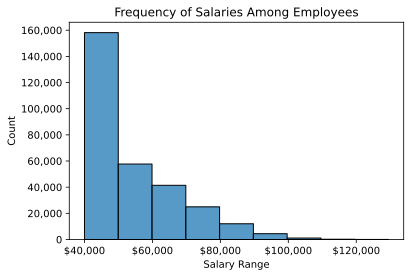

In [3]:
# Plot histogram of salary frequencies with seaborn
histogram = sns.histplot(salary_df, x='salary', bins=9)
# Set labels and title
histogram.set_xlabel('Salary Range')
histogram.set_title('Frequency of Salaries Among Employees')
# Format axes and display
plt.gcf().axes[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gcf().axes[0].xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.show()

In [4]:
# Query database for average salary and employee title information among all
# employees
query = '''
    SELECT title,
           ROUND(AVG(salary), 2) AS avg_salary
    FROM titles
    INNER JOIN employees
        ON employees.emp_title_id=titles.title_id
    INNER JOIN salaries
        ON salaries.emp_no=employees.emp_no
    GROUP BY title;
'''
title_salary_df = pd.read_sql_query(query, connection)
title_salary_df

,title,avg_salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


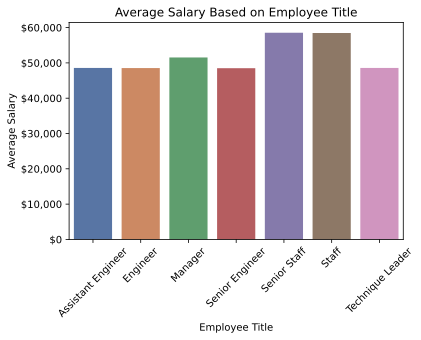

In [5]:
# Create bar chart using queried dataframe
bar_chart = sns.barplot(
    x='title', 
    y='avg_salary', 
    data=title_salary_df,
    palette='deep'
)
# Set title, labels, x and y axis formatting, and display
bar_chart.set_title('Average Salary Based on Employee Title')
bar_chart.set_xlabel('Employee Title')
bar_chart.set_ylabel('Average Salary')
plt.xticks(rotation=45)
plt.gcf().axes[0].yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.show()